<a href="https://colab.research.google.com/github/jrbobes/jrbobes-hitl-ml/blob/master/2024_HITL_XAI_Pancreas_DT_rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HTIL_XAI_Pancreas_DT_rec**

author: jose.bobes at udc.es

Decission tree with a set of recommended features.

# Importing required libraries

In [1]:
# Importing Required Libraries
import sys
print('Python: {}'.format(sys.version))

import scipy
print('scipy: {}'.format(scipy.__version__))

import numpy as np
print('numpy: {}'.format(np.__version__))

import re
print('re: {}'.format(re.__version__))

import graphviz
print('graphviz: {}'.format(graphviz.__version__))

import matplotlib
import matplotlib.pyplot as plt
print('matplotlib: {}'.format(matplotlib.__version__))

import pandas as pd
print('pandas: {}'.format(pd.__version__))

import sklearn
print('sklearn: {}'.format(sklearn.__version__))

from sklearn import metrics
from sklearn import tree

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
scipy: 1.11.4
numpy: 1.25.2
re: 2.2.1
graphviz: 0.20.3
matplotlib: 3.7.1
pandas: 1.5.3
sklearn: 1.2.2


# Cleaning the Pancreas dataset

In [2]:
# 1. Set the FEATURE_NAMES to be used to train the model, except for the therapy_type which is the target.
features = ['ajcc_pathologic_stage',
            #'ajcc_pathologic_t',
            'ajcc_pathologic_m',
            'ajcc_pathologic_n',
            'age_at_index',
            #'other_dx',
            #'gender',
            #'race',
            #'ethnicity',
            'adenocarcinoma_invasion',
            'histological_type',
            'person_neoplasm_cancer_status',
            'year_of_initial_pathologic_diagnosis',
            'initial_pathologic_diagnosis_method',
            'surgery_performed_type',
            'number_of_lymphnodes_positive_by_he',
            #'number_of_lymphnodes_positive_by_ihc',
            'neoplasm_histologic_grade',
            'maximum_tumor_dimension',
            'residual_tumor',
            #'history_of_diabetes',
            #'family_history_of_cancer',
            #'radiation_therapy',
            #'postoperative_rx_tx',
            #'primary_therapy_outcome_success',
            #'new_tumor_events',
            #'days_to_new_tumor_event_after_initial_treatment',
            'therapy_type',
            #'tx_on_clinical_trial',
            #'drug_name',
            #'tobacco_smoking_history',
            #'alcoholic_exposure_category'
]


In [3]:
# 2. Load the dataset
url = "https://raw.githubusercontent.com/jrbobes/jrbobes-hitl-ml/master/tcga_paad_datosRecomendados.csv"

dataset = pd.read_csv(url, sep=';', usecols=features, encoding = "ISO-8859-1")
dataset = dataset.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

print(dataset.shape)
print(dataset.head())

(185, 15)
  ajcc_pathologic_stage ajcc_pathologic_n ajcc_pathologic_m  age_at_index  \
0             Stage IIB                N1                MX            77   
1             Stage IIB                N1                M0            67   
2              Stage IB                N0                MX            59   
3             Stage IIA                N0                M0            61   
4             Stage IIA                N0                M0            65   

  adenocarcinoma_invasion                      histological_type  \
0                     YES  Pancreas-Adenocarcinoma-Other Subtype   
1                     YES    Pancreas-Adenocarcinoma Ductal Type   
2                     YES  Pancreas-Adenocarcinoma-Other Subtype   
3                     YES  Pancreas-Adenocarcinoma-Other Subtype   
4                     YES    Pancreas-Adenocarcinoma Ductal Type   

  person_neoplasm_cancer_status  year_of_initial_pathologic_diagnosis  \
0                    TUMOR FREE              

In [4]:
# 3. Show Datatypes
for column, dtype in zip(dataset.columns, dataset.dtypes):
    print(f"{column}:{dtype}")

ajcc_pathologic_stage:object
ajcc_pathologic_n:object
ajcc_pathologic_m:object
age_at_index:int64
adenocarcinoma_invasion:object
histological_type:object
person_neoplasm_cancer_status:object
year_of_initial_pathologic_diagnosis:float64
initial_pathologic_diagnosis_method:object
surgery_performed_type:object
number_of_lymphnodes_positive_by_he:float64
neoplasm_histologic_grade:object
maximum_tumor_dimension:float64
residual_tumor:object
therapy_type:object


In [5]:
# 4. Missing Values/ Null Values
print(dataset.isnull().sum())

ajcc_pathologic_stage                    3
ajcc_pathologic_n                        1
ajcc_pathologic_m                        0
age_at_index                             0
adenocarcinoma_invasion                  0
histological_type                        1
person_neoplasm_cancer_status           53
year_of_initial_pathologic_diagnosis     1
initial_pathologic_diagnosis_method      5
surgery_performed_type                   2
number_of_lymphnodes_positive_by_he      4
neoplasm_histologic_grade                0
maximum_tumor_dimension                 15
residual_tumor                          12
therapy_type                            64
dtype: int64


In [6]:
# 5. Fill in the missing values
#dataset.days_to_death = dataset.days_to_death.fillna(18250) # Asignamos un valor muy alto (50 años)
dataset.ajcc_pathologic_stage = dataset.ajcc_pathologic_stage.fillna('Stage 0')
#dataset.ajcc_pathologic_t = dataset.ajcc_pathologic_t.fillna('TX')
dataset.ajcc_pathologic_m = dataset.ajcc_pathologic_m.fillna('MX')
dataset.ajcc_pathologic_n = dataset.ajcc_pathologic_n.fillna('NX')
#dataset.race = dataset.race.fillna('Unknown')
#dataset.ethnicity = dataset.ethnicity.fillna('Unknown')
#dataset.person_neoplasm_cancer_status = dataset.person_neoplasm_cancer_status.fillna('Unknown')
dataset.therapy_type = dataset.therapy_type.fillna('Other')
dataset.number_of_lymphnodes_positive_by_he = dataset.number_of_lymphnodes_positive_by_he.fillna(dataset.number_of_lymphnodes_positive_by_he.mean())
#dataset.number_of_lymphnodes_positive_by_ihc = dataset.number_of_lymphnodes_positive_by_ihc.fillna(dataset.number_of_lymphnodes_positive_by_ihc.mean())
#dataset.days_to_new_tumor_event_after_initial_treatment = dataset.days_to_new_tumor_event_after_initial_treatment.fillna(dataset.days_to_new_tumor_event_after_initial_treatment.mean())
#dataset.tx_on_clinical_trial = dataset.tx_on_clinical_trial.fillna('Unknown')
#dataset.drug_name = dataset.drug_name.fillna('None')
#dataset.tobacco_smoking_history = dataset.tobacco_smoking_history.fillna(0)
#dataset.alcoholic_exposure_category = dataset.alcoholic_exposure_category.fillna('None')

dataset.histological_type = dataset.histological_type.fillna('None')
dataset.person_neoplasm_cancer_status = dataset.person_neoplasm_cancer_status.fillna('Unknown')
dataset.year_of_initial_pathologic_diagnosis = dataset.year_of_initial_pathologic_diagnosis.fillna(dataset.year_of_initial_pathologic_diagnosis.mean())
dataset.initial_pathologic_diagnosis_method = dataset.initial_pathologic_diagnosis_method.fillna('Unknown')
dataset.surgery_performed_type = dataset.surgery_performed_type.fillna('Unknown')
dataset.maximum_tumor_dimension = dataset.maximum_tumor_dimension.fillna(dataset.maximum_tumor_dimension.mean())
dataset.residual_tumor = dataset.residual_tumor.fillna('Unknown')
#dataset.history_of_diabetes = dataset.history_of_diabetes.fillna('Unknown')
#dataset.family_history_of_cancer = dataset.family_history_of_cancer.fillna('Unknown')
#dataset.radiation_therapy = dataset.radiation_therapy.fillna('Unknown')
#dataset.postoperative_rx_tx = dataset.postoperative_rx_tx.fillna('Unknown')
#dataset.primary_therapy_outcome_success = dataset.primary_therapy_outcome_success.fillna('Unknown')
#dataset.new_tumor_events = dataset.new_tumor_events.fillna('Unknown')

dataset_null = dataset.isnull()
print(dataset.isnull().sum())

ajcc_pathologic_stage                   0
ajcc_pathologic_n                       0
ajcc_pathologic_m                       0
age_at_index                            0
adenocarcinoma_invasion                 0
histological_type                       0
person_neoplasm_cancer_status           0
year_of_initial_pathologic_diagnosis    0
initial_pathologic_diagnosis_method     0
surgery_performed_type                  0
number_of_lymphnodes_positive_by_he     0
neoplasm_histologic_grade               0
maximum_tumor_dimension                 0
residual_tumor                          0
therapy_type                            0
dtype: int64


In [7]:
# 6. Removing Redundancy
count_duplicates = dataset[dataset.duplicated()].shape[0]
print("Number of duplicate rows:", count_duplicates)

Number of duplicate rows: 0


In [8]:
# There are 6 duplicates with the columns selected.
dataset[dataset.duplicated()]

,ajcc_pathologic_stage,ajcc_pathologic_n,ajcc_pathologic_m,age_at_index,adenocarcinoma_invasion,histological_type,person_neoplasm_cancer_status,year_of_initial_pathologic_diagnosis,initial_pathologic_diagnosis_method,surgery_performed_type,number_of_lymphnodes_positive_by_he,neoplasm_histologic_grade,maximum_tumor_dimension,residual_tumor,therapy_type


# Data Preparation

In [9]:
# 1. Simplify Target with only Chemotherapy or Other
dataset['therapy_type'] = dataset['therapy_type'].replace('Hormone Therapy', 'Other')
dataset['therapy_type'] = dataset['therapy_type'].replace('Vaccine', 'Other')
dataset['therapy_type'] = dataset['therapy_type'].replace('Ancillary', 'Other')

# check that we only get two values: 'Chemotherapy' and 'Other'
dataset['therapy_type'].unique()

array(['Chemotherapy', 'Other'], dtype=object)

In [10]:
# 2. Convert categorical variables into numerical.
# Categorical features need to be transformed before they can be used in a model.

dataset['ajcc_pathologic_stage'] = dataset['ajcc_pathologic_stage'].replace('Stage 0', 0)
dataset['ajcc_pathologic_stage'] = dataset['ajcc_pathologic_stage'].replace('Stage I', 1)
dataset['ajcc_pathologic_stage'] = dataset['ajcc_pathologic_stage'].replace('Stage IA', 2)
dataset['ajcc_pathologic_stage'] = dataset['ajcc_pathologic_stage'].replace('Stage IB', 3)
dataset['ajcc_pathologic_stage'] = dataset['ajcc_pathologic_stage'].replace('Stage II', 4)
dataset['ajcc_pathologic_stage'] = dataset['ajcc_pathologic_stage'].replace('Stage IIA', 5)
dataset['ajcc_pathologic_stage'] = dataset['ajcc_pathologic_stage'].replace('Stage IIB', 6)
dataset['ajcc_pathologic_stage'] = dataset['ajcc_pathologic_stage'].replace('Stage III', 7)
dataset['ajcc_pathologic_stage'] = dataset['ajcc_pathologic_stage'].replace('Stage IV', 8)

#dataset['ajcc_pathologic_t'] = dataset['ajcc_pathologic_t'].replace('TX', 0)
#dataset['ajcc_pathologic_t'] = dataset['ajcc_pathologic_t'].replace('T1', 1)
#dataset['ajcc_pathologic_t'] = dataset['ajcc_pathologic_t'].replace('T2', 2)
#dataset['ajcc_pathologic_t'] = dataset['ajcc_pathologic_t'].replace('T3', 3)
#dataset['ajcc_pathologic_t'] = dataset['ajcc_pathologic_t'].replace('T4', 4)

dataset['ajcc_pathologic_n'] = dataset['ajcc_pathologic_n'].replace('N0', 0)
dataset['ajcc_pathologic_n'] = dataset['ajcc_pathologic_n'].replace('N1', 1)
dataset['ajcc_pathologic_n'] = dataset['ajcc_pathologic_n'].replace('N1b', 2)
dataset['ajcc_pathologic_n'] = dataset['ajcc_pathologic_n'].replace('NX', 3)

dataset['ajcc_pathologic_m'] = dataset['ajcc_pathologic_m'].replace('M0', 0)
dataset['ajcc_pathologic_m'] = dataset['ajcc_pathologic_m'].replace('M1', 1)
dataset['ajcc_pathologic_m'] = dataset['ajcc_pathologic_m'].replace('MX', 2)

In [11]:
# 3. Drop unneeded Features
# Remove therapy_type from the X vector, and keep it as the target.
X = dataset.drop(['therapy_type'], axis=1)
y = dataset['therapy_type']

In [12]:
# 4. Use One-hot encoding for the rest of categorical features. We get a binary variable for each category.
X_encoded = pd.get_dummies(X)

In [13]:
# 5. Split the data in train and test sets
X_train,X_test,y_train,y_test = train_test_split(X_encoded, y, test_size=0.3,random_state=42)

# Creating a Decision Tree model

In [14]:
# 1. Get the best possible parameters for a Decision Tree
best_acc = 0

for criterion in "gini", "entropy":
    for max_depth in [2,3,4,5,6]:
        for min_samples_leaf in [5, 10, 20, 30]:
            dtree = tree.DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, min_samples_leaf=min_samples_leaf)
            dtree.fit(X_train, y_train)
            predicitions = dtree.predict(X_test)
            acc = metrics.accuracy_score(y_test, predicitions)
            if acc > best_acc:
                best_params = f"criterion: {criterion}, max_depth: {max_depth}, min_samples_leaf: {min_samples_leaf}"
                best_acc = acc

print("Decision Tree Best Parameters: ", best_params)
print("Decision Tree Best Accuracy: ", best_acc)

Decision Tree Best Parameters:  criterion: entropy, max_depth: 4, min_samples_leaf: 5
Decision Tree Best Accuracy:  0.5714285714285714


In [15]:
# 2. Create the Decision Tree model and fit the training data
dt_clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=4, min_samples_leaf=5)
dt_clf = dt_clf.fit(X_train, y_train)

In [16]:
# 3. Predict over the test data and show accuracy
y_dt_pred = dt_clf.predict(X_test)
dt_acc = metrics.accuracy_score(y_test, y_dt_pred)
print("Decision Tree accuracy: ", dt_acc)

Decision Tree accuracy:  0.5714285714285714


In [17]:
# 4. Show Classification Report
print(metrics.classification_report(y_test, y_dt_pred))

              precision    recall  f1-score   support

Chemotherapy       0.56      0.76      0.65        29
       Other       0.59      0.37      0.45        27

    accuracy                           0.57        56
   macro avg       0.58      0.56      0.55        56
weighted avg       0.58      0.57      0.55        56



<Axes: >

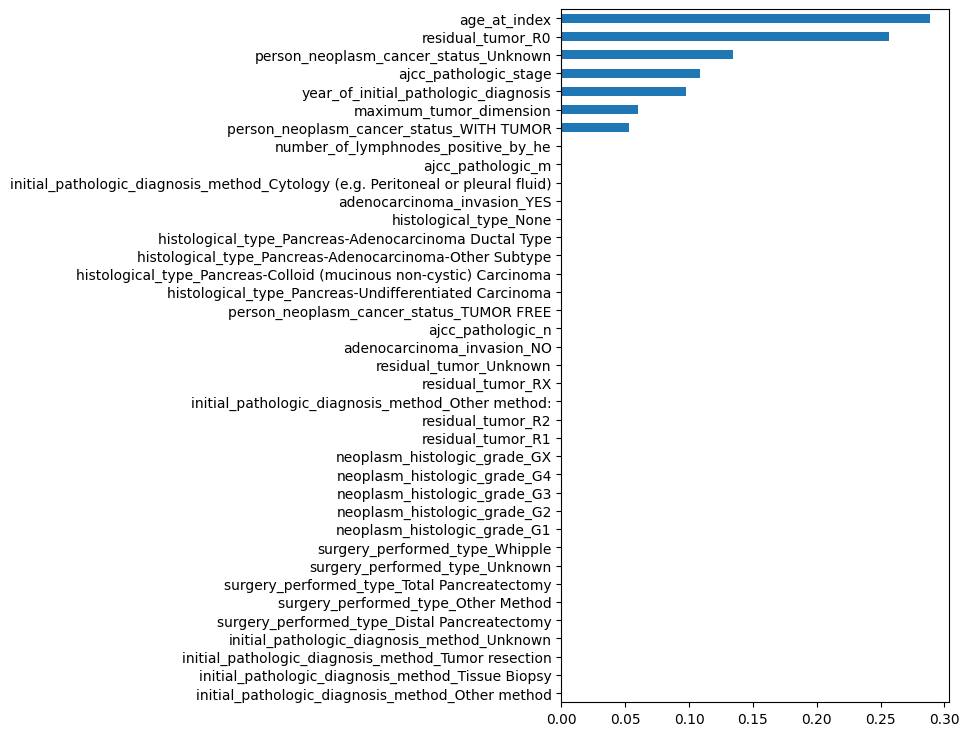

In [18]:
# 5. Feature Importance of the model
feat_importances = pd.DataFrame(dt_clf.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=True, inplace=True)
feat_importances.plot(kind='barh', figsize=(5,9), legend=False)

In [19]:
# 6. Get textual representation of the tree model
#Force the feature names to be a list: https://stackoverflow.com/questions/72178276/error-on-export-text-for-decision-tree-sklearn
dt_text_representation = tree.export_text(dt_clf,feature_names=X_encoded.columns.tolist())
print(dt_text_representation)

|--- year_of_initial_pathologic_diagnosis <= 2012.50
|   |--- age_at_index <= 70.50
|   |   |--- ajcc_pathologic_stage <= 5.50
|   |   |   |--- person_neoplasm_cancer_status_WITH TUMOR <= 0.50
|   |   |   |   |--- class: Other
|   |   |   |--- person_neoplasm_cancer_status_WITH TUMOR >  0.50
|   |   |   |   |--- class: Other
|   |   |--- ajcc_pathologic_stage >  5.50
|   |   |   |--- person_neoplasm_cancer_status_Unknown <= 0.50
|   |   |   |   |--- class: Chemotherapy
|   |   |   |--- person_neoplasm_cancer_status_Unknown >  0.50
|   |   |   |   |--- class: Other
|   |--- age_at_index >  70.50
|   |   |--- residual_tumor_R0 <= 0.50
|   |   |   |--- age_at_index <= 79.50
|   |   |   |   |--- class: Chemotherapy
|   |   |   |--- age_at_index >  79.50
|   |   |   |   |--- class: Other
|   |   |--- residual_tumor_R0 >  0.50
|   |   |   |--- class: Chemotherapy
|--- year_of_initial_pathologic_diagnosis >  2012.50
|   |--- maximum_tumor_dimension <= 3.77
|   |   |--- age_at_index <= 66.50
|

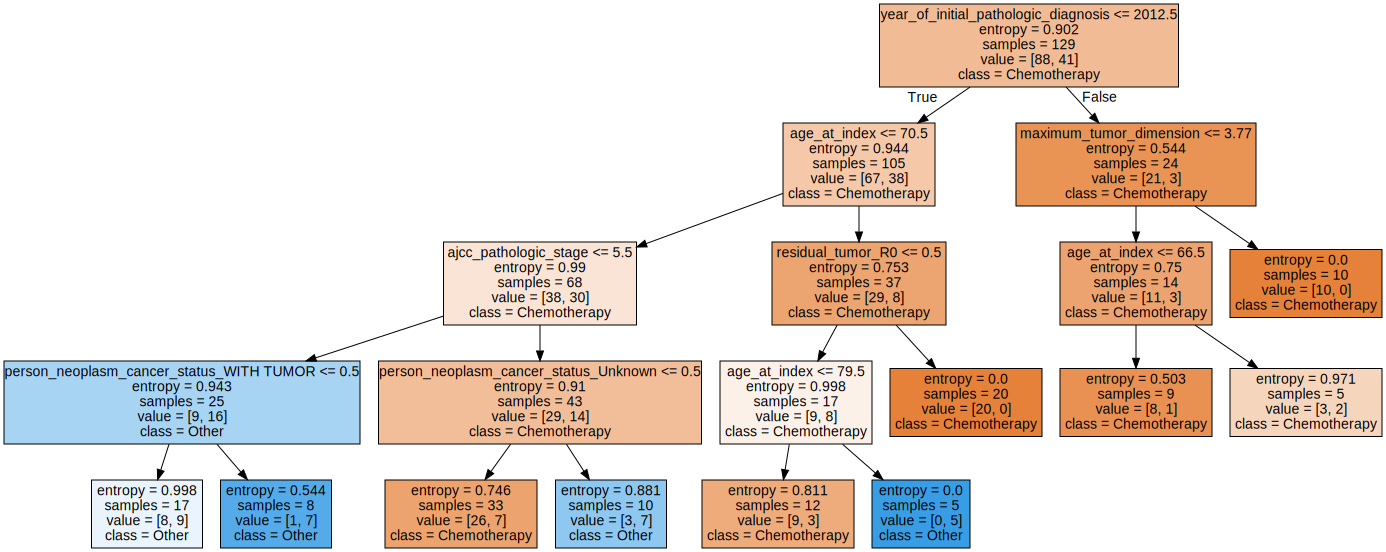

In [20]:
# 7. Visualize graph with graphviz library
dot_data = tree.export_graphviz(dt_clf, out_file=None, feature_names= X_encoded.columns, class_names=['Chemotherapy', 'Other'], filled=True)
dt_graph = graphviz.Source(dot_data, format="png")
dt_graph

In [21]:
# 8. Export DT as an image
dt_graph.format = "png"
dt_graph.render("xai_Pancreas_DT_rec")

'xai_Pancreas_DT_rec.png'

# Permutation Importance

Permutation Importance is an algorithm that computes importance scores
for each of the feature variables of a dataset. The importance measures are determined by computing the sensitivity of a model to random permutations of feature values.

It measures the importance of a feature by calculating the increase in the model’s prediction error after permuting the feature.

In [ ]:
# 1. Install required package
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=c9f8af2d6983bd778fe7460815126842d7f4f652f71292992f8c69dda64b4a1e
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
# 2. Get permutation importance data and show weights
dt_perm = PermutationImportance(dt_clf, random_state=42).fit(X_test, y_test)
eli5.show_weights(dt_perm, feature_names = X_encoded.columns.tolist(), top=100)

Weight,Feature
0.0500 ± 0.0267,ajcc_pathologic_stage
0.0429 ± 0.0735,year_of_initial_pathologic_diagnosis
0.0321 ± 0.0763,person_neoplasm_cancer_status_Unknown
0.0321 ± 0.0614,age_at_index
0 ± 0.0000,histological_type_Pancreas-Adenocarcinoma Ductal Type
0 ± 0.0000,person_neoplasm_cancer_status_WITH TUMOR
0 ± 0.0000,person_neoplasm_cancer_status_TUMOR FREE
0 ± 0.0000,histological_type_Pancreas-Undifferentiated Carcinoma
0 ± 0.0000,histological_type_Pancreas-Colloid (mucinous non-cystic) Carcinoma
0 ± 0.0000,histological_type_Pancreas-Adenocarcinoma-Other Subtype


In [ ]:
# 3. Patient 3 data
eli5.show_prediction(dt_clf, X_train.iloc[2])

In [ ]:
# 4. Patient 4 data
eli5.show_prediction(dt_clf, X_train.iloc[3])

# Exaplainability with SHAP

In [ ]:
!pip install shap
import shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 3.9 MB/s eta 0:00:00


In [ ]:
# Explain the model's predictions using SHAP
explainerShap = shap.TreeExplainer(dt_clf)

# Compute shap_values for X_test
shap_values = explainerShap.shap_values(X_test)

**Pacient 3**
Get the data from patient 3

In [ ]:
paciente3 = X_encoded.loc[[2]]
paciente3

,ajcc_pathologic_stage,ajcc_pathologic_n,ajcc_pathologic_m,age_at_index,year_of_initial_pathologic_diagnosis,number_of_lymphnodes_positive_by_he,maximum_tumor_dimension,adenocarcinoma_invasion_NO,adenocarcinoma_invasion_YES,histological_type_None,...,neoplasm_histologic_grade_G1,neoplasm_histologic_grade_G2,neoplasm_histologic_grade_G3,neoplasm_histologic_grade_G4,neoplasm_histologic_grade_GX,residual_tumor_R0,residual_tumor_R1,residual_tumor_R2,residual_tumor_RX,residual_tumor_Unknown
2,3,0,2,59,2011.0,0.0,3.0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
y[2]

'Other'

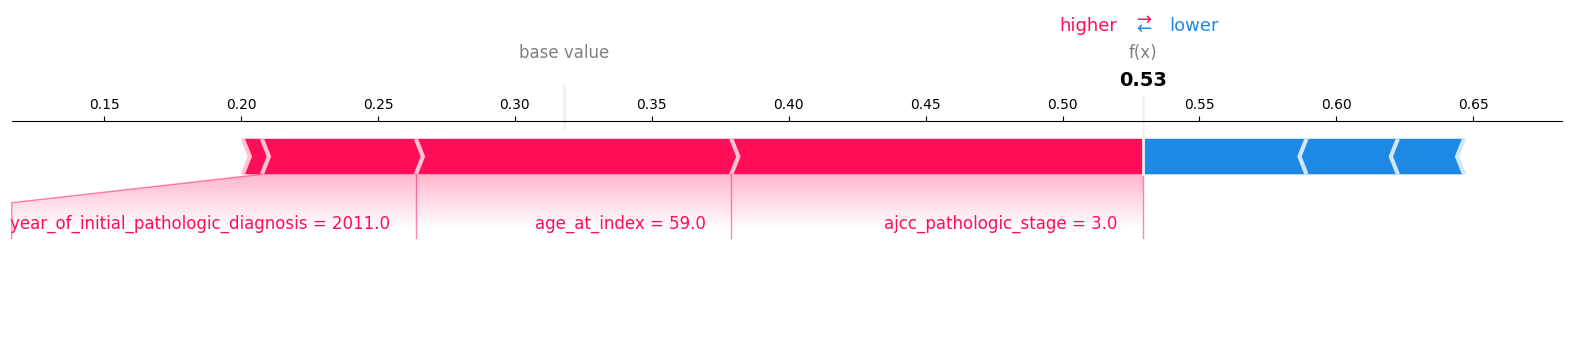

In [ ]:
shap.initjs()
paciente3_shap_values = explainerShap.shap_values(paciente3)

shap.force_plot(explainerShap.expected_value[1], paciente3_shap_values[1], paciente3, matplotlib = True, show=False)

In [ ]:
#plt.savefig("shap_paciente3.png")
plt.close()

Paciente 4

In [ ]:
paciente4 = X_encoded.loc[[3]]
paciente4

,ajcc_pathologic_stage,ajcc_pathologic_n,ajcc_pathologic_m,age_at_index,year_of_initial_pathologic_diagnosis,number_of_lymphnodes_positive_by_he,maximum_tumor_dimension,adenocarcinoma_invasion_NO,adenocarcinoma_invasion_YES,histological_type_None,...,neoplasm_histologic_grade_G1,neoplasm_histologic_grade_G2,neoplasm_histologic_grade_G3,neoplasm_histologic_grade_G4,neoplasm_histologic_grade_GX,residual_tumor_R0,residual_tumor_R1,residual_tumor_R2,residual_tumor_RX,residual_tumor_Unknown
3,5,0,0,61,2011.0,0.0,2.2,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
y[3]

'Chemotherapy'

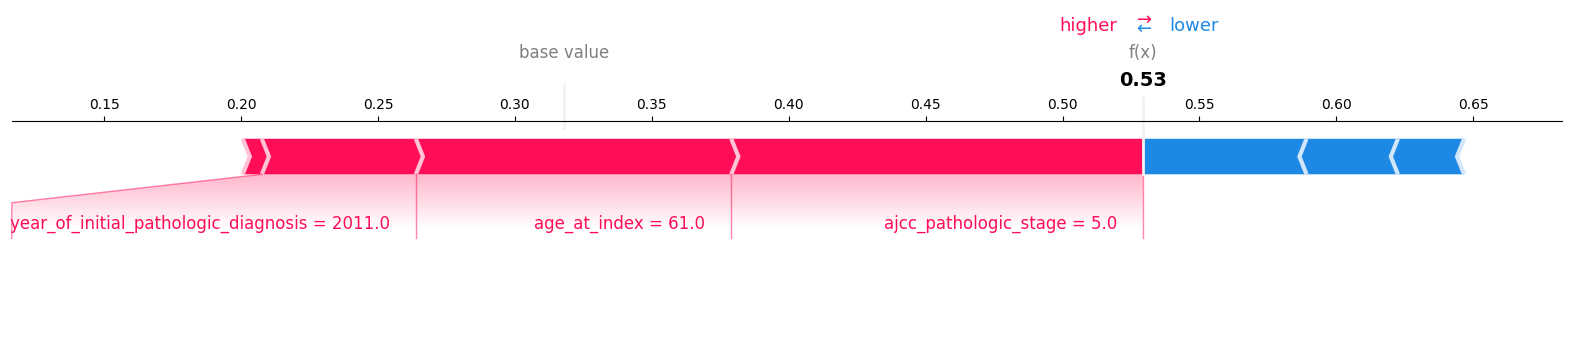

In [ ]:
paciente4_shap_values = explainerShap.shap_values(paciente4)

shap.force_plot(explainerShap.expected_value[1], paciente4_shap_values[1], paciente4, matplotlib = True, show=False)

Feature values in pink cause to increase the prediction. Size of the bar shows the magnitude of the feature's effect.

Feature values in blue causse to decrease the prediction. Sum of all feature SHAP values explain why model prediction was different from the baseline.

In [ ]:
#plt.savefig("shap_paciente4.png")
plt.close()

Summary plot will give us the variable importance plot. Features with high predicting power are shown at the top and the ones with low predicting powers are shown at the bottom.

We could see the contribution of each data into the prediction probability. The redder the colour, the higher the value and vice versa. Also, when the value is on the positive side, it contributes to the class 0 prediction result probability and vice versa.

Variable Importance Plot - Global Interpretation


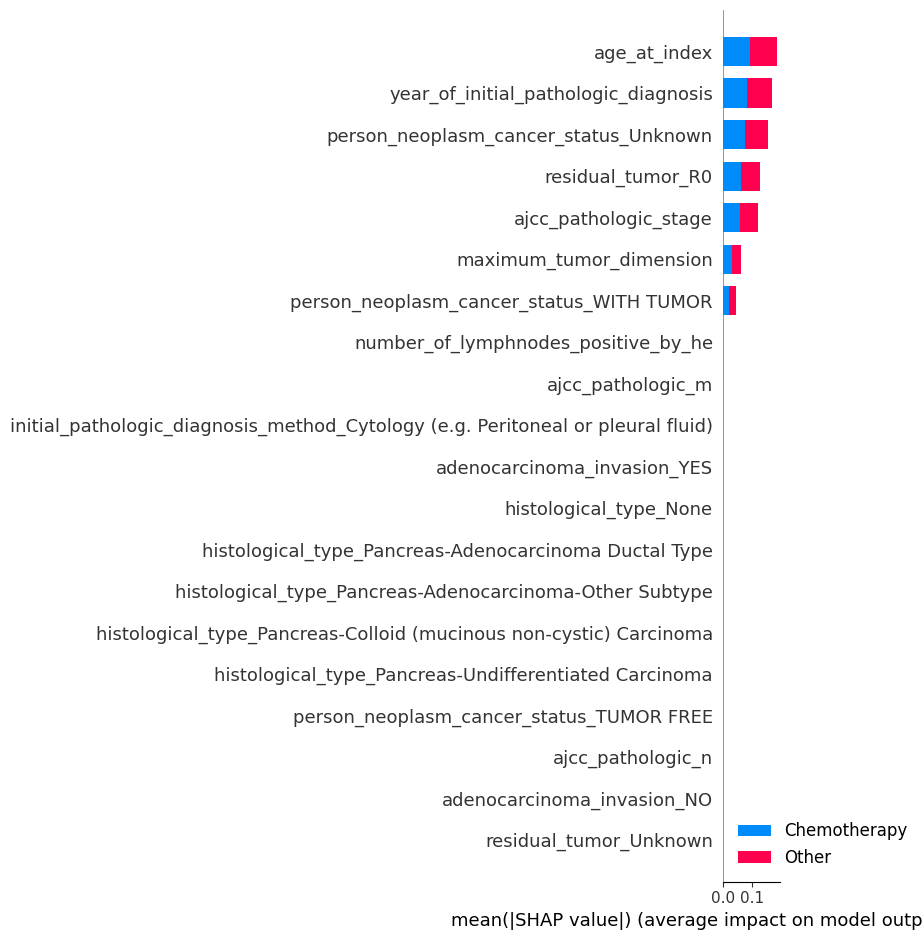

In [ ]:
print("Variable Importance Plot - Global Interpretation")
shap.summary_plot(shap_values, X_test, plot_type='bar', class_names=['Chemotherapy','Other'])

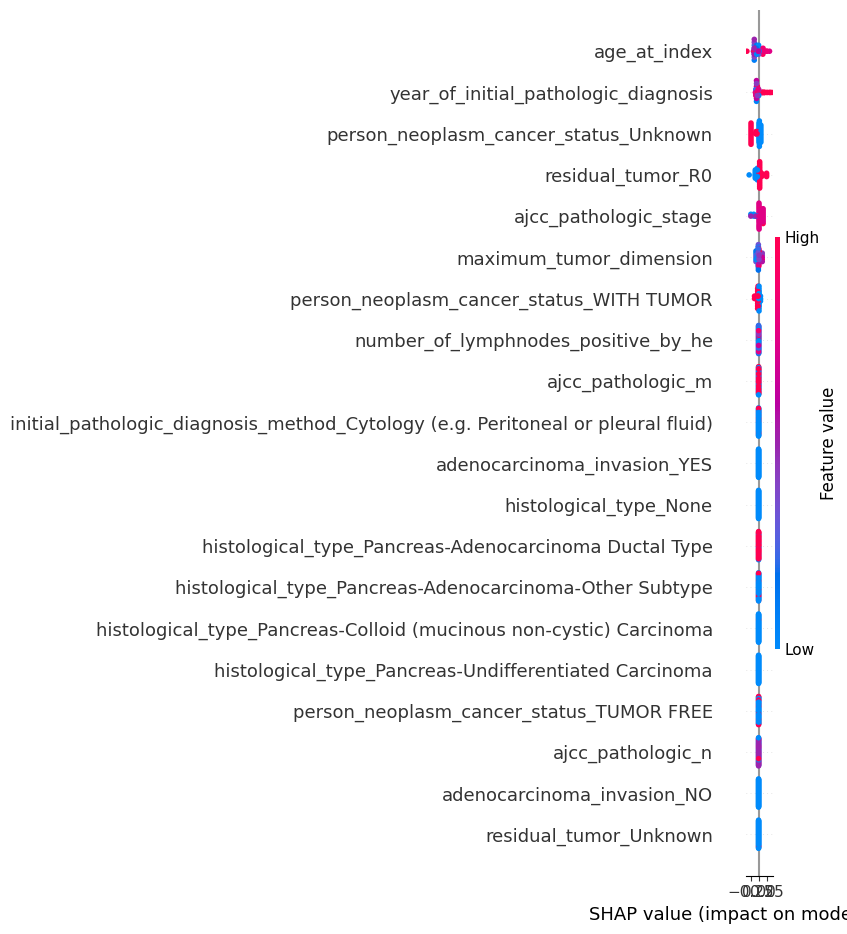

In [ ]:
# Summary plot
shap.summary_plot(shap_values[0], X_test)

The **partial dependence plot** is a global method: The method considers all instances and gives a statement about the global relationship of a feature with the predicted outcome.

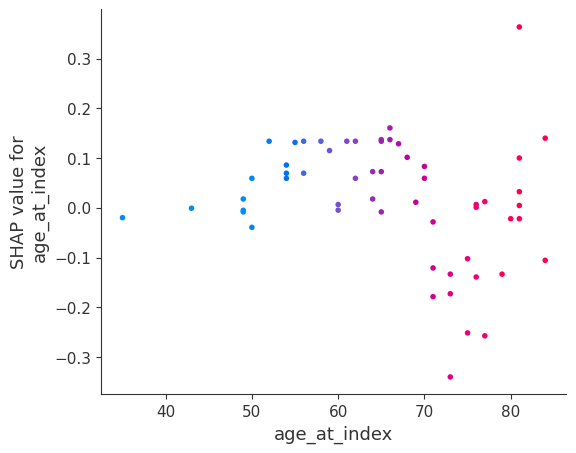

In [ ]:
shap.dependence_plot('age_at_index', shap_values[1], X_test, interaction_index='age_at_index')

A continuación incluimos un gráfico de decisión:

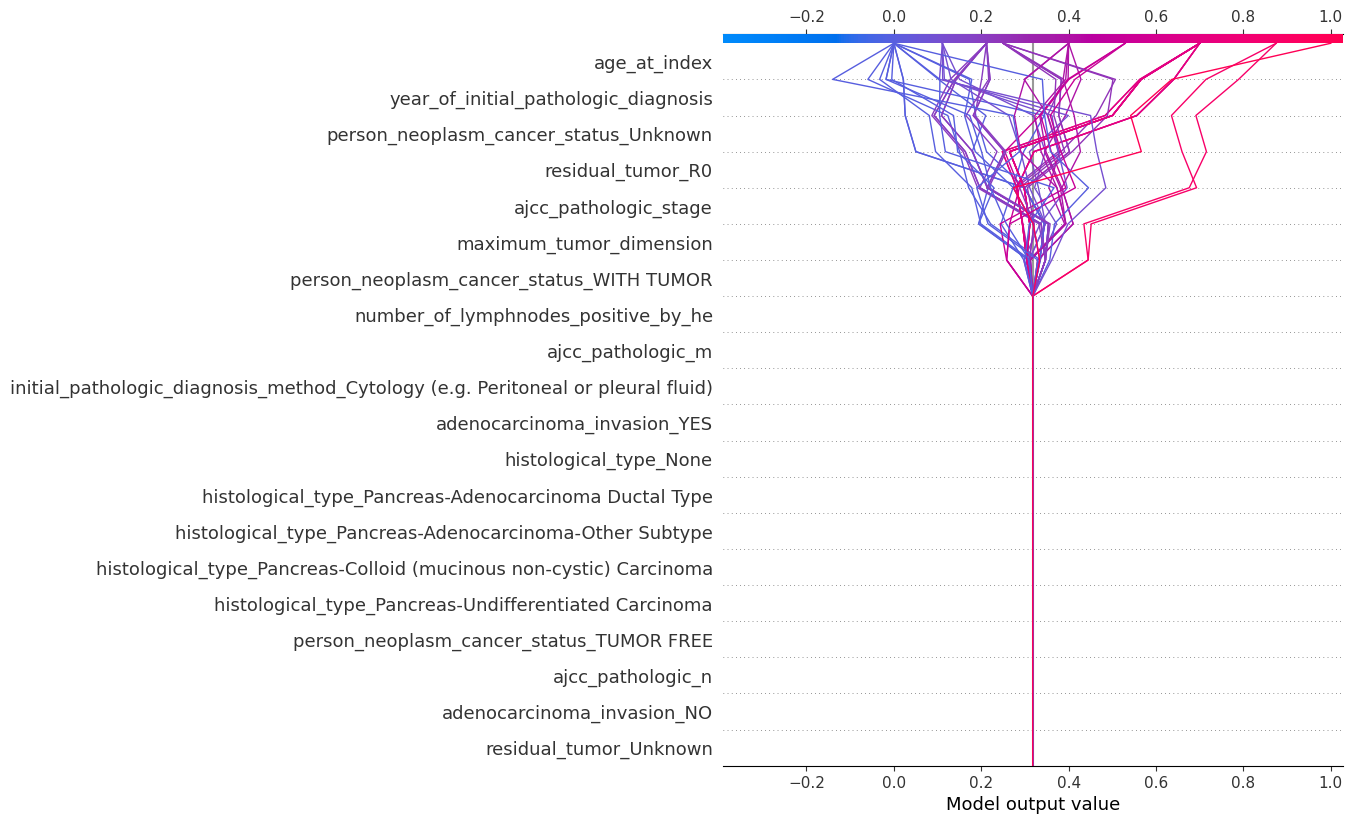

In [ ]:
i=1
shap.decision_plot(explainerShap.expected_value[i], shap_values[i], feature_names = list(X_encoded.columns))

Y finalmente un gráfico de fuerzas:

In [ ]:
shap.initjs()
i = 1
shap.force_plot(explainerShap.expected_value[i], shap_values[i], feature_names = list(X_encoded.columns))

# Explainability with LIME

LIME (Local Interpretable Model-Agnostic Explanations) is a method for explaining the predictions of any classifier and regressor (model agnostic).

In [22]:
# Install LIME (Local Interpretable Model-agnostic Explanations)..
!pip install lime

# Import required libraries
from lime.lime_tabular import LimeTabularExplainer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=ed17f475fe721128ff8b493279ec4d0b65f673c3bda7ef9a595f049fdc639501
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [23]:
# XAI with LIME (Local Interpretable Model-agnostic Explanations)
explainerLime = LimeTabularExplainer(X_encoded.values, feature_names=X_encoded.columns, class_names = ['Chemotherapy', 'Other'], discretize_continuous=True)
#explainer2 = LimeTabularExplainer(X_encoded.values[:,:], feature_names = X_encoded.columns,class_names=['Chemotherapy','Other'], discretizer='decile',kernel_width=5,discretize_continuous=True,verbose=True)

# Patient 3 LIME explanation
expPatient3 = explainerLime.explain_instance(X_encoded.values[2], dt_clf.predict_proba, num_features=10, top_labels=5)
#exp2 = explainer2.explain_instance(X_encoded.iloc[1,:],rf_clf.predict_proba)

expPatient3.show_in_notebook(show_all=True)
expPatient3.as_pyplot_figure()
plt.close()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [24]:
# Patient 4 LIME explanation
#expPatient4 = explainerLime.explain_instance(X_encoded.values[3], dt_clf.predict_proba, num_features=10, top_labels=3)
#expPatient4.show_in_notebook(show_all=True)
#expPatient4.as_pyplot_figure()
#plt.close()

In [25]:
import warnings
warnings.filterwarnings('ignore')

#Get the overall most common important features
feature_importance = {}
# Get, for each patient, the most important feature
for idx, i in enumerate(X_encoded.values): #X_encoded.values[:3]
  expl = explainerLime.explain_instance(i, dt_clf.predict_proba, num_features=20, top_labels=20)

  # Iterate over the set of features
  for jdx, j in enumerate(expl.as_list()):

    # Get feature and value
    splitedj = str(j[0]).split()
    if (len(splitedj) == 5):
      feature_name = splitedj[2]
    else:
      feature_name = splitedj[0]

    feature_importance_value = abs(j[1])

    #print(str(idx) + "-" + str(jdx) + " - feature: " + feature_name + " = " + str(feature_importance_value))

    # Add new value to the feature (average)
    if feature_name in feature_importance:
      previous_value = feature_importance[feature_name]
      new_value = (previous_value + feature_importance_value) / 2
      #print("  *previous_value = " + str(previous_value) + " / new value = " + str(new_value))
    else:
      new_value = feature_importance_value
      #print("new value = " + str(feature_importance_value))

    feature_importance[feature_name] = new_value


dict(sorted(feature_importance.items(), key=lambda item: item[1], reverse = True))

{'person_neoplasm_cancer_status_Unknown': 0.18107786827165834,
 'ajcc_pathologic_stage': 0.13359371408095594,
 'residual_tumor_R0': 0.12304064802248411,
 'year_of_initial_pathologic_diagnosis': 0.10930165540178133,
 'age_at_index': 0.06698718196126438,
 'adenocarcinoma_invasion_NO': 0.060325360562849546,
 'neoplasm_histologic_grade_GX': 0.057242233659891374,
 'person_neoplasm_cancer_status_WITH': 0.05095441264070079,
 '0.00': 0.05077794952832396,
 'histological_type_None': 0.04447613131817753,
 'maximum_tumor_dimension': 0.04067152108440125,
 'histological_type_Pancreas-Undifferentiated': 0.04000783762406514,
 'residual_tumor_RX': 0.036891159957026964,
 'surgery_performed_type_Total': 0.034472920760959355,
 'residual_tumor_R2': 0.03122511402631834,
 'surgery_performed_type_Unknown': 0.029970678185320447,
 'neoplasm_histologic_grade_G4': 0.026043201456896068,
 'histological_type_Pancreas-Colloid': 0.021526395998591415,
 'neoplasm_histologic_grade_G1': 0.019335723134222264,
 'surgery_per